In [47]:
##################################################################################################################################################################################################
# Libraries needed for the project
%pylab inline
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from scipy import stats
import statsmodels.api as sm
##################################################################################################################################################################################################

Populating the interactive namespace from numpy and matplotlib


In [55]:
# CELL 1 
# Code to read the given data (i.e., “Times-Higher-Education-World-University-Rankings-Top100.xlsx”) into the program.
higher_education_ranking_df = pd.read_excel('Times-Higher-Education-World-University-Rankings-Top100.xlsx', index_col = 0)

# Code to create one tabular illustration to show the top 5 universities in the UK (United Kingdom), USA (United States of America) and Australia, respectively. 
# The following information is required to be included in the illustration: the “National Rank” (i.e., 1, 2, 3, 4, or 5); the “University Name”; and the “Total Score”.
'''collects data from the specific columns and turns it in to a dataframe'''
ranking = higher_education_ranking_df[['country', 'university_name', 'total_score']]
#display(ranking)

'''splits the dataframe containing only UK University data from the dataframe above and creates another dataframe'''
uk = ranking[higher_education_ranking_df.country.isin(['United Kingdom'])]
'''sorts the new dataframe by the total score in descending order where only the first 5 rows are returned and only the first and second column are shown and the index is dropped'''
uk_sorted = uk.sort_values(by = ['total_score'], ascending = False).head(n=5).iloc[:, 1:3].reset_index(drop = True)
'''starts the index at 1 to show the first top university'''
uk_sorted.index = uk_sorted.index + 1
'''renaming the columns to ensure they are fit the aesthetic'''
uk_sorted.columns = ['University Name', 'Total Score']
#display(uk_sorted)

'''splits the dataframe containing only USA University data from the dataframe above and creates another dataframe'''
usa = ranking[higher_education_ranking_df.country.isin(['United States of America'])]
'''sorts the new dataframe by the total score in descending order where only the first 5 rows are returned and only the first and second column are shown and the index is dropped'''
usa_sorted = usa.sort_values(by = ['total_score'], ascending = False).head(n=5).iloc[:, 1:3].reset_index(drop = True)
'''starts the index at 1 to show the first top university'''
usa_sorted.index = usa_sorted.index + 1
'''renaming the columns to ensure they are fit the aesthetic'''
usa_sorted.columns = ['University Name', 'Total Score']
#display(usa_sorted)

'''splits the dataframe containing only Australia University data from the dataframe above and creates another dataframe'''
aus = ranking[higher_education_ranking_df.country.isin(['Australia'])]
'''sorts the new dataframe by the total score in descending order where only the first 5 rows are returned and only the first and second column are shown and the index is dropped'''
aus_sorted = aus.sort_values(by = ['total_score'], ascending = False).head(n=5).iloc[:, 1:3].reset_index(drop = True)
'''starts the index at 1 to show the first top university'''
aus_sorted.index = aus_sorted.index + 1
'''renaming the columns to ensure they are fit the aesthetic'''
aus_sorted.columns = ['University Name', 'Total Score']
#display(aus_sorted)

'''puts all sorted dataframes into a list'''
frames = [uk_sorted, usa_sorted, aus_sorted]
'''concatenates all the dataframes into one big one where all the data will concatenate on the 0th axis and the keys indicate which country the top 5 universities belong to'''
result = pd.concat(frames, axis=0, join="inner",  keys=["United Kingdom", "United States of America", "Australia"])
'''changes the style, font and colour of the illustration title'''
styles = [dict(selector="caption", props=[("text-align", "center"), ("font-size", "120%"), ("font-weight", "bold"), ("color", "black")])]

# Displaying the illustration in the program
display(result.style.set_table_styles(styles).set_caption('Top 5 Universities in the United Kingdom, United States of America and Australia'))


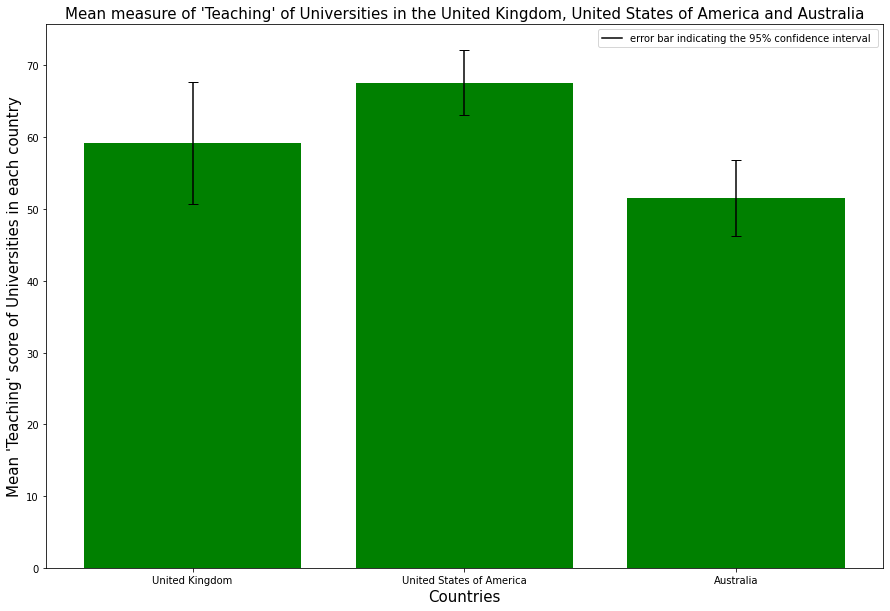

In [58]:
# CELL2
# Code to analyse the data contained in the variable called “teaching”
teaching = higher_education_ranking_df[['country', 'university_name', 'teaching']]
#teaching

# Code to plot a bar graph (note, plot a single plot) that illustrates the difference between UK, USA and Australia.
# The following information is included in the visualisation: the mean measure of “teaching” for universities in each country in question; and the error bars that indicate the 95% confidence interval.
'''splits the dataframe containing only UK University 'teaching' data from the dataframe above and creates another dataframe'''
uk_teaching_df = teaching[higher_education_ranking_df.country.isin(['United Kingdom'])]
'''calculates the mean of the teaching scores of UK Universities'''
uk_teaching_mean = uk_teaching_df['teaching'].mean()
'''calculates the 95% confidence interval of the teaching scores of UK Universities'''
uk_teaching_err =  1.96 * std(uk_teaching_df['teaching']) / sqrt(len(uk_teaching_df['teaching']))

'''splits the dataframe containing only USA University 'teaching' data from the dataframe above and creates another dataframe'''
usa_teaching_df = teaching[higher_education_ranking_df.country.isin(['United States of America'])]
'''calculates the mean of the teaching scores of USA Universities'''
usa_teaching_mean = usa_teaching_df['teaching'].mean()
'''calculates the 95% confidence interval of the teaching scores of USA Universities'''
usa_teaching_err =  1.96 * std(usa_teaching_df['teaching']) / sqrt(len(usa_teaching_df['teaching']))

'''splits the dataframe containing only Aussie University 'teaching' data from the dataframe above and creates another dataframe'''
aus_teaching_df = teaching[higher_education_ranking_df.country.isin(['Australia'])]
'''calculates the mean of the teaching scores of Aussie Universities'''
aus_teaching_mean = aus_teaching_df['teaching'].mean()
'''calculates the 95% confidence interval of the teaching scores of Aussie Universities'''
aus_teaching_err =  1.96 * std(aus_teaching_df['teaching']) / sqrt(len(aus_teaching_df['teaching']))

'''code to plot the mean teaching scores of Universities in UK, USA & Australia and the error bars to indicate the 95% confidence interval'''
plt.figure(figsize(15,10))
plt.bar('United Kingdom', uk_teaching_mean, yerr = uk_teaching_err, capsize = 5, color = 'g')
plt.bar('United States of America', usa_teaching_mean, yerr = usa_teaching_err, capsize = 5, color = 'g')
plt.bar('Australia', aus_teaching_mean, yerr = aus_teaching_err, capsize = 5, color = 'g')

title("Mean measure of 'Teaching' of Universities in the United Kingdom, United States of America and Australia", fontsize = 15)
plt.xlabel("Countries", fontsize = 15)
plt.ylabel("Mean 'Teaching' score of Universities in each country", fontsize = 15)

'''adds a legend/key to show that the black line represents the error bar'''
black_line = mlines.Line2D([], [], color = 'black', label = 'error bar indicating the 95% confidence interval ')
plt.legend(handles = [black_line])

# Display the visualisation in your programme.
plt.show()


In [ ]:
# CELL3 – 10 marks

uk mean = 59.22
#uk_teaching_CI = stats.t.interval(alpha=0.95, df=len(uk_teaching_df['teaching'])-1, loc=np.mean(uk_teaching_df['teaching']), scale=stats.sem(uk_teaching_df['teaching']))
#print(uk_teaching_CI)



In [ ]:
# CELL4 – 10 marks




In [ ]:
# CELL5 – 10 marks




In [ ]:
# CELL6 – 10 marks




In [ ]:
import scipy
print(scipy.__version__)